# Illustration of data augmentation using Keras

In [72]:
import glob
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [70]:
def draw_random_pic_matrix(DATA_PATH, NUM_EXAMPLES, NUM_MUTATIONS_PER_PIC,
                           ROTATION_RANGE=40, 
                           WIDTH_SHIFT_RANGE=0.2,
                           HEIGHT_SHIFT_RANGE=0.2,
                           SHEAR_RANGE=0.2,
                           ZOOM_RANGE=0.2,
                           HORIZONTAL_FLIP=True,
                           seed=None):
    if seed is not None:
        np.random.seed(seed)
    classes = [ name for name in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, name)) ]
    nclasses = len(classes)
    files = {cl:glob.glob(DATA_PATH+cl+"/*.jpg") for cl in classes}
    np.random.shuffle(classes)
    random_choices = [files[c][np.random.randint(0,len(files[c]),size=1)[0]] for c in classes[:NUM_EXAMPLES]]  
    
    datagen = ImageDataGenerator(
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    shear_range=SHEAR_RANGE,
    zoom_range=ZOOM_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    fill_mode='nearest')
    fig, axs = plt.subplots(nrows=NUM_EXAMPLES, ncols=1+NUM_MUTATIONS_PER_PIC, figsize=(8,8))
    for i,f in enumerate(random_choices):
        axrow = axs[i]
        img = load_img(f)  # this is a PIL image
        x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
        x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
        ax = axrow[0]
        ax.imshow(img)
        ax.axis("off")
        j=0
        for batch in datagen.flow(x, batch_size=1):
            ax = axrow[1+j]
            ax.imshow(image.array_to_img(batch[0]))
            j+=1
            ax.axis("off")
            if j==NUM_MUTATIONS_PER_PIC:
                break
    plt.show()

## Try an experiment with the various parameters to get an intuition for their action

### Explanations

- **DATA_PATH**: Directory that contains images.
- **NUM_EXAMPLES**: Number of persons (classes) to use.
- **NUM_MUTATIONS_PER_PIC**: Number of random transformations per person.
- **ROTATION_RANGE**:  Integer degree range for random rotations
- **WIDTH_SHIFT_RANGE**: Float (fraction of total width). Range for random horizontal shifts.
- **HEIGHT_SHIFT_RANGE**: Float (fraction of total height). Range for random vertical shifts.
- **SHEAR_RANGE**: Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
- **ZOOM_RANGE**:  Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
- **HORIZONTAL_FLIP**: Whether or not to flip (mirror) the images w.r.t. to a vertical axis (Randomly flip inputs horizontally).
- **SEED**: Seed for the utilised pseudo-random number generator.

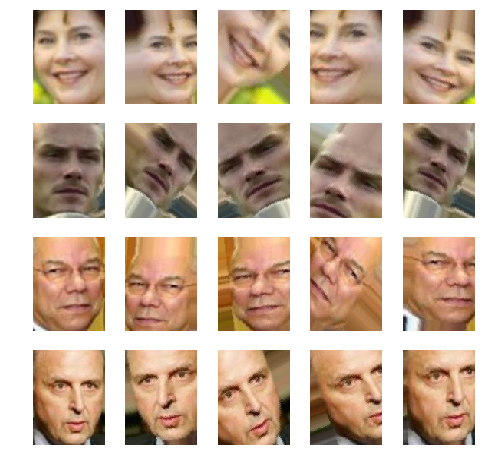

In [73]:
draw_random_pic_matrix(DATA_PATH="Images/LFW_PEOPLE_Train_Test/Train/", 
                       NUM_EXAMPLES=4, 
                       NUM_MUTATIONS_PER_PIC=4,
                       ROTATION_RANGE=40, 
                       WIDTH_SHIFT_RANGE=0.2,
                       HEIGHT_SHIFT_RANGE=0.2,
                       SHEAR_RANGE=0.2,
                       ZOOM_RANGE=0.2,
                       HORIZONTAL_FLIP=True,
                       seed=42)

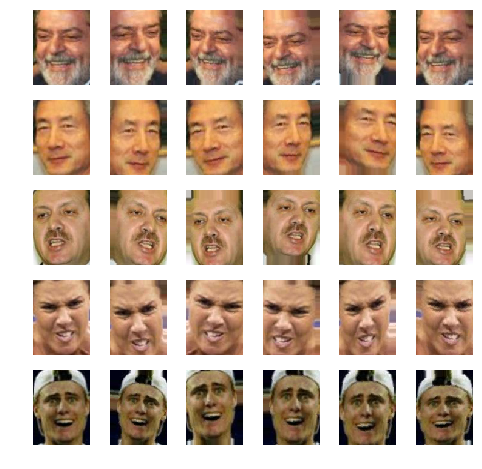

In [76]:
draw_random_pic_matrix("Images/LFW_PEOPLE_Train_Test/Train/", 
                       NUM_EXAMPLES=5, 
                       NUM_MUTATIONS_PER_PIC=5,
                       ROTATION_RANGE=5, 
                       WIDTH_SHIFT_RANGE=0.1,
                       HEIGHT_SHIFT_RANGE=0.1,
                       SHEAR_RANGE=0.1,
                       ZOOM_RANGE=0.1,
                       HORIZONTAL_FLIP=True,
                       seed=43)